# Gerardo Durán Martín

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.api import SARIMAX
from statsmodels.stats.stattools import jarque_bera
from arch.unitroot import PhillipsPerron
from pydataset import data
from datetime import datetime
%matplotlib inline

In [3]:
dat = data("UKgas")
dat.index = dat.time
dat.drop("time", axis=1, inplace=True)
dat.head()

,UKgas
time,
1960.00,160.1
1960.25,129.7
1960.50,84.8
1960.75,120.1
1961.00,160.1


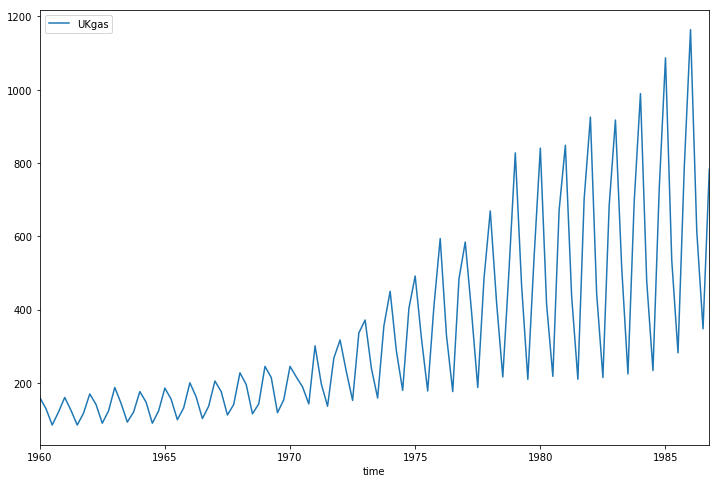

In [21]:
dat.plot(figsize=(12,8));

## Phillips Perron Test of Unit Test
$$
    H_0: \not\exists \text{Unit Root} \\
    H_a: \exists \text{Unit Root} \\
$$

In [395]:
PhillipsPerron(dat, trend="nc", lags=1)

Test Statistic,-2.719
P-value,0.006
Lags,1


The partial correlation plot and the correlation plot seem to indicate an ARIMA model

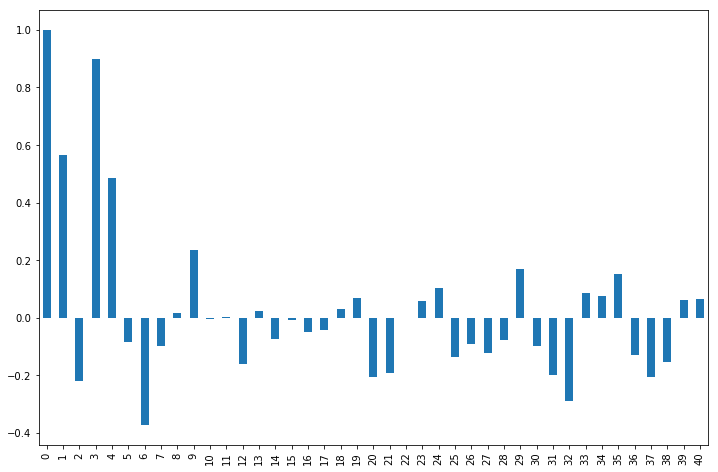

In [18]:
pd.Series(pacf(dat)).plot(kind="bar", figsize=(12,8))

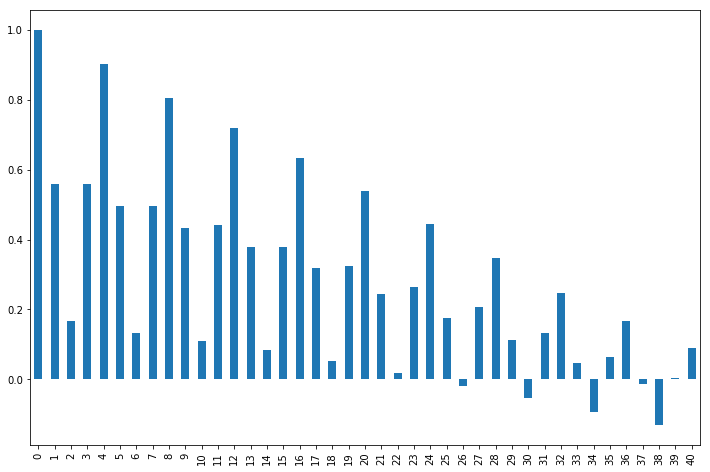

In [20]:
pd.Series(acf(dat)).plot(kind="bar", figsize=(12,8));

In [22]:
fitdata = [float(pgr) for pgr in dat.UKgas.values]
model = SARIMAX(fitdata, trend="c" , order=(3,1,1), seasonal_order=(1, 4, 0, 12))
model = model.fit(maxiter=500)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  108
Model:             SARIMAX(3, 1, 1)x(1, 4, 0, 12)   Log Likelihood                -370.271
Date:                            Sun, 21 May 2017   AIC                            754.542
Time:                                    21:09:45   BIC                            773.317
Sample:                                         0   HQIC                           762.155
                                            - 108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.2071      5.230      2.143      0.032       0.956      21.459
ar.L1         -1.0962      0.101    -10.827      0.000      -1.295      -0.898
ar.L2         -1.0962      0.129     -8.503      0.000      -1.349      -0.844
ar.L3         -1.0000      0.080    -12.469      0.000      -1.157      -0.843
ma.L1         -0.2806      0.116     -2.420      0.016      -0.508      -0.053
ar.S.L12      -0.5855      0.119     -4.900      0.000      -0.820      -0.351
sigma2       964.3301    202.936      4.752      0.000     566.584    1362.077
===================================================================================
Ljung-Box (Q):                       47.61   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.19   Prob(JB):                         0.90
Heteroskedasticity (H):               1.65   Skew:                             0.14
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""